In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression, HuberRegressor
import pickle
import itertools
import time
import ot
import os
from scipy.stats import rankdata, kendalltau, spearmanr
import seaborn as sns
from datetime import datetime
# from scipy.signal import savgol_filter
# from scipy.ndimage import gaussian_filter1d

In [2]:
import tv1d

In [3]:
alpha_arr = np.linspace(-0.5, 0.5, 51)

In [4]:
alpha_arr*3

array([-1.5 , -1.44, -1.38, -1.32, -1.26, -1.2 , -1.14, -1.08, -1.02,
       -0.96, -0.9 , -0.84, -0.78, -0.72, -0.66, -0.6 , -0.54, -0.48,
       -0.42, -0.36, -0.3 , -0.24, -0.18, -0.12, -0.06,  0.  ,  0.06,
        0.12,  0.18,  0.24,  0.3 ,  0.36,  0.42,  0.48,  0.54,  0.6 ,
        0.66,  0.72,  0.78,  0.84,  0.9 ,  0.96,  1.02,  1.08,  1.14,
        1.2 ,  1.26,  1.32,  1.38,  1.44,  1.5 ])

In [5]:
log_dir = './UC_logs'
cali_dir = './UC_cali'

In [ ]:
plt.style.available

In [7]:
plt.style.use('seaborn-whitegrid')

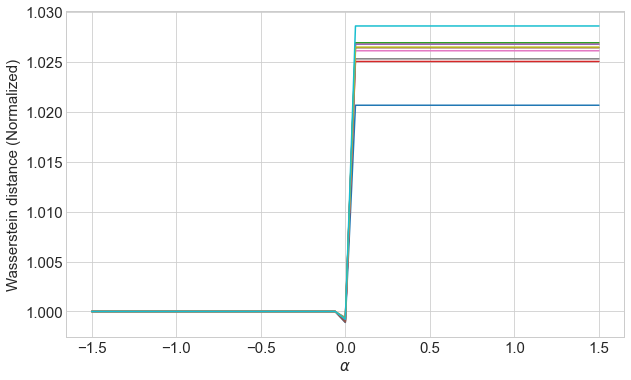

In [9]:
prof_idx = 0
bench_zero = False

plt.rcParams["axes.prop_cycle"] = plt.cycler("color", plt.cm.tab10.colors)
plt.figure(figsize=(10, 6))

for k in range(10):   
    sub_folder = "prof_{}_sim_{}_zero_{}".format(prof_idx, k, bench_zero)
    sub_dir = "{}/{}".format(cali_dir, sub_folder)

    with open('{}/sink_arr.pickle'.format(sub_dir), 'rb') as fp:
        sink = pickle.load(fp)
    
    with open('{}/likelihood.pickle'.format(sub_dir), 'rb') as fp:
        likeli = pickle.load(fp)
    
    den_sink = tv1d.denoising_1D_TV(sink, 0.001/2)
    plt.plot(alpha_arr*30/10, sink/sink[0])
    plt.tick_params(axis='both', which='major', labelsize=15)
    plt.xlabel(r'$\alpha$', fontsize=15)
    plt.ylabel('Wasserstein distance (Normalized)', fontsize=15)   
# plt.savefig('assocprof_real.pdf', format='pdf', dpi=1000, bbox_inches='tight', pad_inches=0.1)

In [11]:
min_alph = np.zeros((4, 10))
bench_zero = False

for prof_idx in range(4):
    for k in range(10):
        sub_folder = "prof_{}_sim_{}_zero_{}".format(prof_idx, k, bench_zero)
        sub_dir = "{}/{}".format(cali_dir, sub_folder)

        with open('{}/sink_arr.pickle'.format(sub_dir), 'rb') as fp:
            sink = pickle.load(fp)
        den_sink = tv1d.denoising_1D_TV(sink, 0.001/2)
        cand = np.where(den_sink == den_sink.min())[0]
        min_id = cand[np.argmin(np.abs(cand-25))]
        min_alph[prof_idx, k] = alpha_arr[min_id]

In [12]:
min_alph_zero = np.zeros((4, 10))
bench_zero = True

for prof_idx in range(4):
    for k in range(10):
        sub_folder = "prof_{}_sim_{}_zero_{}".format(prof_idx, k, bench_zero)
        sub_dir = "{}/{}".format(cali_dir, sub_folder)

        with open('{}/sink_arr.pickle'.format(sub_dir), 'rb') as fp:
            sink = pickle.load(fp)
        den_sink = tv1d.denoising_1D_TV(sink, 0.001/2)
        cand = np.where(den_sink == den_sink.min())[0]
        min_id = cand[np.argmin(np.abs(cand-25))]
        min_alph_zero[prof_idx, k] = alpha_arr[min_id]

In [13]:
np.mean(min_alph_zero, axis=1)*30/10

array([ 0.  , -0.06, -0.06,  0.  ])

In [15]:
# Copied from UC_Statistics.ipynb
s_corr = np.array([0.78005201, 0.74658334, 0.86756306, 0.40293628])
k_corr = np.array([0.61613575, 0.58538198, 0.70663379, 0.29784267])

In [16]:
spearmanr(s_corr, np.mean(min_alph_zero, axis=1)*30/10)

SpearmanrResult(correlation=-0.4472135954999579, pvalue=0.552786404500042)

In [23]:
np.mean(min_alph, axis=1)*30/10

array([ 0.   , -0.06 , -0.06 ,  1.194])

In [24]:
np.mean(min_alph - min_alph_zero, axis=1)*30/10

array([0.   , 0.   , 0.   , 1.194])

In [27]:
spearmanr(s_corr, np.mean(min_alph-min_alph_zero, axis=1))

SpearmanrResult(correlation=-0.7745966692414834, pvalue=0.22540333075851657)

In [28]:
kendalltau(k_corr, np.mean(min_alph-min_alph_zero, axis=1))

KendalltauResult(correlation=-0.7071067811865477, pvalue=0.17971249487899987)

## Paths

In [ ]:
with open('./sim_logs/sim_0_alpha_0/real_path.pickle', 'rb') as fp:
    real_path = pickle.load(fp)

with open('./sim_cali/sim_0/ot_path_50.pickle', 'rb') as fp:
    ot_path_50 = pickle.load(fp)

In [ ]:
path_num = real_path.shape[0]

In [ ]:
for p in range(path_num):
    plt.plot(real_path[p, :])

In [ ]:
(real_path[:, 1] == 1) & (real_path[:, 0] == 0)

In [ ]:
np.sum(np.abs(real_path[:, 4] - real_path[:, 2]) > 0)/300

In [ ]:
for p in range(path_num):
    plt.plot(ot_path_0[p, :])

In [ ]:
ot_path_0[:50, :] - ot_path_50[:50, :]

## Transition matrix

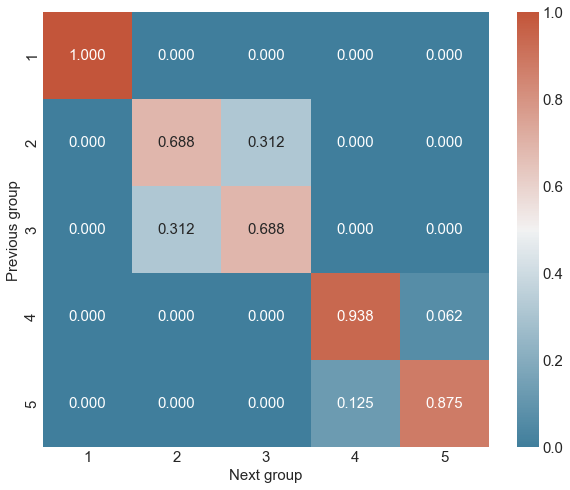

In [15]:
file_name = "uni_trans.pickle"
x_shape = 5
with open('{}/{}'.format(log_dir, file_name), 'rb') as fp:
    uni_trans = pickle.load(fp)
for row in range(5):
    uni_trans[row, :] = uni_trans[row, :]/uni_trans[row, :].sum()

cmap = sns.diverging_palette(230, 20, as_cmap=True)
plt.figure(figsize=(10, 8))
ax = sns.heatmap(uni_trans, xticklabels=np.arange(1, x_shape+1),
                 yticklabels=np.arange(1, x_shape+1),
                 annot=True, fmt=".3f", annot_kws={"fontsize": 15}, cmap=cmap)
plt.tick_params(axis='both', which='major', labelsize=15)
plt.xlabel('Next group', fontsize=15)
plt.ylabel('Previous group', fontsize=15)
cbar = ax.collections[0].colorbar
cbar.ax.tick_params(labelsize=15)
plt.savefig('uni_trans.pdf', format='pdf', dpi=1000, bbox_inches='tight', pad_inches=0.1)

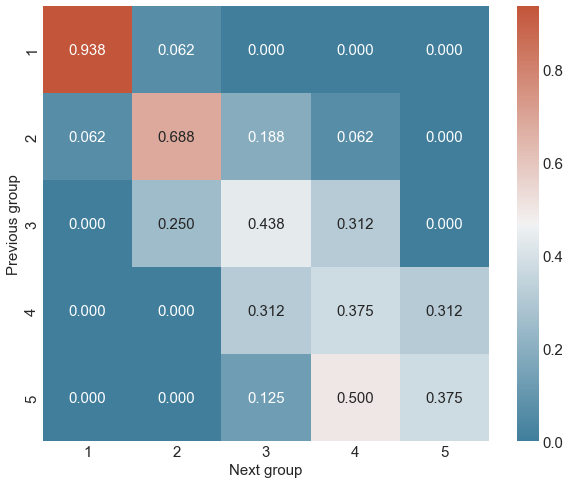

In [29]:
title_idx = 2
file_name = "wage_trans_{}.pickle".format(title_idx)
with open('{}/{}'.format(log_dir, file_name), 'rb') as fp:
    wage_trans = pickle.load(fp)
for row in range(5):
    wage_trans[row, :] = wage_trans[row, :]/wage_trans[row, :].sum()
x_shape = 5
        
cmap = sns.diverging_palette(230, 20, as_cmap=True)
plt.figure(figsize=(10, 8))
ax = sns.heatmap(wage_trans, xticklabels=np.arange(1, x_shape+1),
                 yticklabels=np.arange(1, x_shape+1),
                 annot=True, fmt=".3f", annot_kws={"fontsize": 15}, cmap=cmap)

plt.tick_params(axis='both', which='major', labelsize=15)
plt.xlabel('Next group', fontsize=15)
plt.ylabel('Previous group', fontsize=15)
cbar = ax.collections[0].colorbar
cbar.ax.tick_params(labelsize=15)
# plt.legend(loc='best', fontsize=15)
plt.savefig('assitprof_trans.pdf', format='pdf', dpi=1000, bbox_inches='tight', pad_inches=0.1)

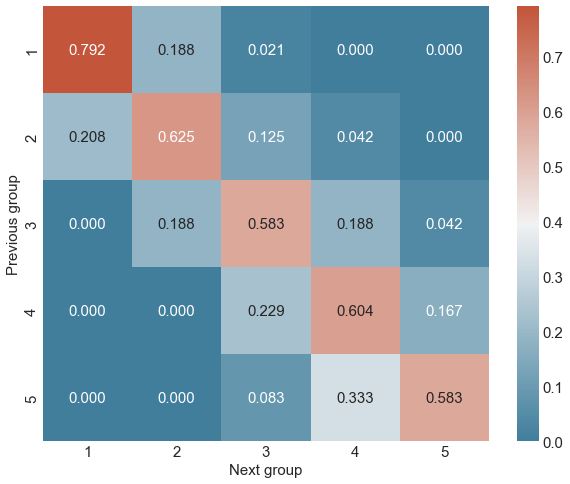

In [25]:
x_shape = 5
wage_agg = np.zeros((5, 5))
for title_idx in range(3):
    file_name = "wage_trans_{}.pickle".format(title_idx)
    with open('{}/{}'.format(log_dir, file_name), 'rb') as fp:
        wage_trans = pickle.load(fp)
    for row in range(5):
        wage_trans[row, :] = wage_trans[row, :]/wage_trans[row, :].sum()
    wage_agg += wage_trans 

wage_agg = wage_agg/3        
cmap = sns.diverging_palette(230, 20, as_cmap=True)
plt.figure(figsize=(10, 8))
ax = sns.heatmap(wage_agg, xticklabels=np.arange(1, x_shape+1),
                 yticklabels=np.arange(1, x_shape+1),
                 annot=True, fmt=".3f", annot_kws={"fontsize": 15}, cmap=cmap)
plt.tick_params(axis='both', which='major', labelsize=15)
plt.xlabel('Next group', fontsize=15)
plt.ylabel('Previous group', fontsize=15)
cbar = ax.collections[0].colorbar
cbar.ax.tick_params(labelsize=15)
# plt.legend(loc='best', fontsize=15)
plt.savefig('prof_trans.pdf', format='pdf', dpi=1000, bbox_inches='tight', pad_inches=0.1)